<a href="https://colab.research.google.com/github/ara1x/DataMining-Project/blob/main/phase3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **[1] Problem**
The main objective of this project is to analyze students academic and demographic factors to predict and understand their levels of anxiety.

Using data mining techniques, the project will:

* **Classification**: Categorize students into four anxiety levels (Minimal, Mild, Moderate, Severe).

* **Clustering**: Group students with similar anxiety patterns and academic characteristics to uncover common risk factors.

This project aims to shed light on the psychological challenges students face, helping to create a more supportive educational environment that reduces anxiety and promotes student well-being.

## **[2] Data Mining Task**

This project formalizes two data mining tasks:

### **Classification Task:**
- Type: Supervised multi-class classification
- Goal: Predict which anxiety level (Minimal, Mild, Moderate, Severe) a student belongs to
- Method: Decision Tree Classification using Information Gain (Entropy) and Gini Index

### **Clustering Task:**
- Type: Unsupervised clustering
- Goal: Discover natural groupings of students with similar anxiety patterns
- Method: K-means clustering

## **[3] Data**

### Dataset Description:

This project utilizes anxiety data from university students, which were part of a broader study examining anxiety, stress, and depression. In this project, the focus is specifically on anxiety.

**Dataset Source**:
- URL: https://figshare.com/articles/dataset/MHP_Anxiety_Stress_Depression_Dataset_of_University_Students/25771164
- Original Format: CSV file (Anxiety.csv)
- Preprocessed Format: Excel file (Anxiety..xlsx) from Phase 2

**Dataset Characteristics**:
- Number of Objects: 2,028 students
- Number of Attributes: 16
- Class Label: Anxiety Label

**Class Distribution**:
```
Severe Anxiety      744
Moderate Anxiety    620
Mild Anxiety        505
Minimal Anxiety     159
```

**Attributes**:
- Demographic: Age, Gender, University, Department, Academic Year
- Academic: Current CGPA, Scholarship
- Anxiety Questions: Q1-Q7 (scale 0-3: Never, Sometimes, Often, Always)

**Data Quality**:
- No missing values
- No outliers
- Data is clean and ready for analysis

---
### **IMPLEMENTATION**

## **Dataset Description**

In [ ]:
import pandas as pd

data = pd.read_excel("Anxiety.updated.xlsx")

## **Number of Objects**

In [ ]:
print("Shape of dataset (rows, columns):", data.shape)

Shape of dataset (rows, columns): (2028, 16)


## **Class Attribute and Counts**

In [ ]:
print(data['Anxiety Label'].value_counts())

Anxiety Label
Severe Anxiety      744
Moderate Anxiety    620
Mild Anxiety        505
Minimal Anxiety     159
Name: count, dtype: int64


## **Number and Data Types of Attributes**

In [ ]:
data.dtypes

,0
1. Age,object
2. Gender,object
3. University,object
4. Department,object
5. Academic Year,object
6. Current CGPA,object
7. Scholarship,object
Academic_Anxiety_Level,int64
Academic_Worry_Level,int64
Relaxation_Difficulty_Level,int64


## **The possible values for each attribute**

## Below are the main features in the dataset and their possible values.  
This helps clarify the meaning of each attribute and how the responses are represented.

| Feature | Possible Values | Description |
|----------|-----------------|--------------|
| 1. Age | 18 – 24 | Age range of the students. |
| 2. Gender | Male, Female | Student gender. |
| 6. Current CGPA | 2.50 – 4.00 | Academic performance level. |
| Q1 – Q7 (Anxiety Questions) | 0 = Never, 1 = Sometimes, 2 = Often, 3 = Always | Students’ responses to each anxiety-related question. |
| Anxiety Label | Normal, Mild, Moderate, Severe | Final classification of anxiety level based on total score. |

This table summarizes the key attributes and the type of data each represents in the dataset.


## **Sample of the Raw Dataset**

In [ ]:
data.head()

,1. Age,2. Gender,3. University,4. Department,5. Academic Year,6. Current CGPA,7. Scholarship,Academic_Anxiety_Level,Academic_Worry_Level,Relaxation_Difficulty_Level,Academic_Irritation_Level,Excessive_Worry_Level,Academic_Restlessness_Level,Fear_Level,Anxiety Value,Anxiety Label
0,18-22,Female,"Independent University, Bangladesh (IUB)",Engineering - CS / CSE / CSC / Similar to CS,Second Year or Equivalent,2.50 - 2.99,No,2,2,3,2,2,2,2,15,Severe Anxiety
1,18-22,Male,"Independent University, Bangladesh (IUB)",Engineering - CS / CSE / CSC / Similar to CS,Third Year or Equivalent,3.00 - 3.39,No,1,2,2,1,1,3,2,12,Moderate Anxiety
2,18-22,Male,American International University Bangladesh (...,Engineering - CS / CSE / CSC / Similar to CS,Third Year or Equivalent,3.00 - 3.39,No,0,0,0,0,0,0,0,0,Minimal Anxiety
3,18-22,Male,American International University Bangladesh (...,Engineering - CS / CSE / CSC / Similar to CS,Third Year or Equivalent,3.00 - 3.39,No,2,1,1,1,2,1,2,10,Moderate Anxiety
4,18-22,Male,North South University (NSU),Engineering - CS / CSE / CSC / Similar to CS,Second Year or Equivalent,2.50 - 2.99,No,3,0,3,3,1,1,3,14,Moderate Anxiety


## **[4] Data Preprocessing**

#### **Preprocessing**:

In Phase 2, the following preprocessing was completed:
- Data cleaning
- Missing value check (There is no missing value)
- Outlier detection and handling
- Data validation

#### **Additional Preprocessing to prepare the data**:

**To Prepare For Classification**:
- Encode categorical variables (Age, Gender, University, Department, Academic Year, CGPA, Scholarship) using Label Encoding
- Remove "Anxiety Value" column (to avoid data leakage)
- Split data into training and testing sets with different ratios

**To Prepare For Clustering**:
- Select only numeric features (7 anxiety questions)
- Scale features using StandardScaler

---
### **IMPLEMENTATION**

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('Preprocessed_dataset.csv')
df1= pd.DataFrame(df)

All possible values for each attribute

In [ ]:

for column in df1.columns:
    print(f"Unique values for column '{column}':")
    print(df[column].unique())
    print("\n")

Unique values for column '1. Age':
['18-22' '23-26' '27-30' 'Above 30' 'Below 18']


Unique values for column '2. Gender':
['Female' 'Male' 'Prefer not to say']


Unique values for column '3. University':
['Independent University, Bangladesh (IUB)'
 'American International University Bangladesh (AIUB)'
 'North South University (NSU)' 'Islamic University of Technology (IUT)'
 'Patuakhali Science and Technology University'
 'Rajshahi University of Engineering and Technology (RUET)'
 'Dhaka University (DU)'
 'Bangladesh University of Engineering and Technology (BUET)'
 'Dhaka University of Engineering and Technology (DUET)'
 'United International University (UIU)' 'East West University (EWU)'
 'BRAC University' 'Bangladesh Agricultural University (BAU)'
 'Rajshahi University (RU)' 'Daffodil University']


Unique values for column '4. Department':
['Engineering - CS / CSE / CSC / Similar to CS'
 'Engineering - EEE/ ECE / Similar to EEE' 'Other'
 'Business and Entrepreneurship Studies' 'Env

### **Summary of dataset**

In [ ]:
df1.describe()

,Academic_Anxiety_Level,Academic_Worry_Level,Relaxation_Difficulty_Level,Academic_Irritation_Level,Excessive_Worry_Level,Academic_Restlessness_Level,Fear_Level,Anxiety Value,Anxiety_Label_Encoded
count,2028.000000,2028.000000,2028.000000,2028.000000,2028.000000,2028.000000,2028.000000,2028.000000,2028.000000
mean,0.592702,0.544707,0.584813,0.594181,0.621959,0.599112,0.577581,0.587865,1.790434
std,0.317426,0.342540,0.332074,0.321795,0.327403,0.330916,0.352371,0.261596,1.182410
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.380952,1.000000
50%,0.666667,0.666667,0.666667,0.666667,0.666667,0.666667,0.666667,0.619048,2.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.809524,3.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000


The summary statistics show the count, mean, standard deviation, and value range for each variable in the dataset. Overall, the variables have similar averages, moderate variation, and values that span from the minimum to the maximum of the scale used. This indicates that the dataset is complete, consistent, and well-distributed across all measured items

In [ ]:
(df1.describe())
(df1.describe(include=['object']))

,1. Age,2. Gender,3. University,4. Department,5. Academic Year,6. Current CGPA,7. Scholarship,Anxiety Label
count,2028,2028,2028,2028,2028,2028,2028,2028
unique,5,3,15,12,5,6,2,4
top,18-22,Male,"Independent University, Bangladesh (IUB)",Engineering - CS / CSE / CSC / Similar to CS,First Year or Equivalent,3.00 - 3.39,No,Severe Anxiety
freq,1304,1405,532,1409,601,583,1602,744


### **Missing Values**

In [ ]:
missing=df.isna().sum()
print("The Missing Values in each column:")
print(missing)
print("\n Total Number Of Missing Values In The Dataset:",missing.sum())

The Missing Values in each column:
1. Age                         0
2. Gender                      0
3. University                  0
4. Department                  0
5. Academic Year               0
6. Current CGPA                0
7. Scholarship                 0
Academic_Anxiety_Level         0
Academic_Worry_Level           0
Relaxation_Difficulty_Level    0
Academic_Irritation_Level      0
Excessive_Worry_Level          0
Academic_Restlessness_Level    0
Fear_Level                     0
Anxiety Value                  0
Anxiety Label                  0
Anxiety_Label_Encoded          0
dtype: int64

 Total Number Of Missing Values In The Dataset: 0


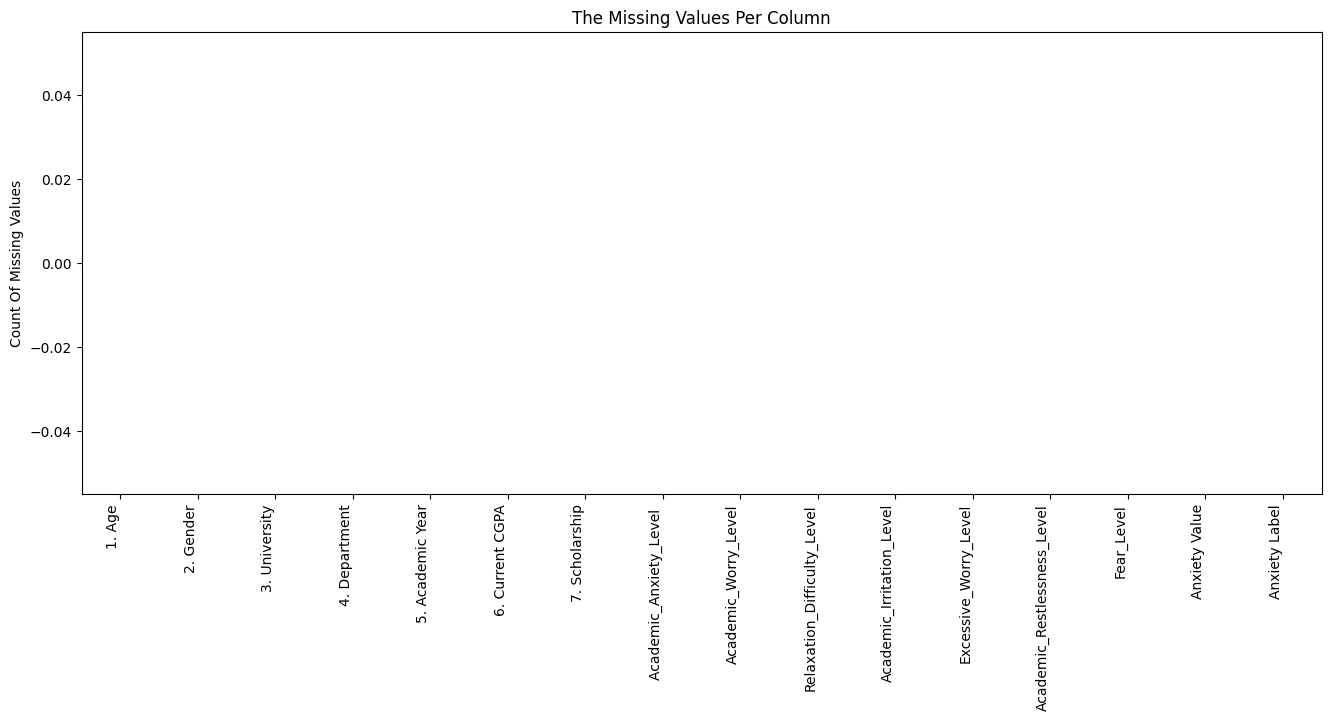

In [ ]:
plt.figure(figsize=(16,6))
missing.plot(kind='bar')
plt.title("The Missing Values Per Column")
plt.ylabel("Count Of Missing Values")
plt.xticks(rotation=90,ha='right')
plt.show()

The bar char show that no missing values. This indicates that the data is complete, and there is no need to apply any methods for handling missing values.

### **Bar Chart showing the distribution of data based on Anxiety Level**

Anxiety Label
Severe Anxiety      744
Moderate Anxiety    620
Mild Anxiety        505
Minimal Anxiety     159
Name: count, dtype: int64


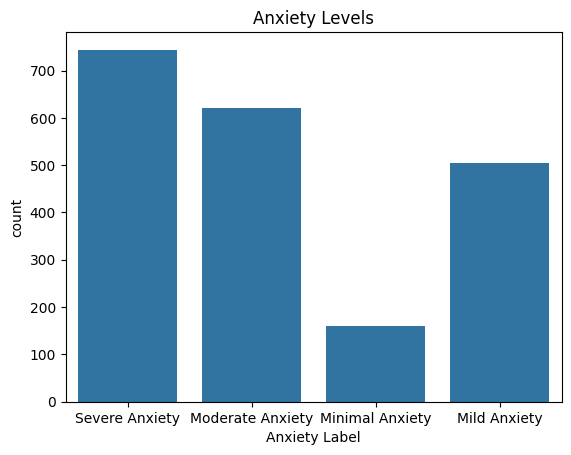

In [ ]:
print(df['Anxiety Label'].value_counts())
sns.countplot(data=df, x='Anxiety Label')
plt.title("Anxiety Levels")
plt.show()

The bar chart shows that (Severe Anxiety) is the most common category in the sample, followed by (Moderate) and (Mild) with (Minimal Anxiety) being the least. This indicates that higher anxiety levels dominate the dataset, which is important for understanding the problem and guiding the choice of analysis methods.

# **Five number summary**

In [ ]:
numeric_cols = df.select_dtypes(include=['int64', 'float64'])

five_num_summary = numeric_cols.describe(percentiles=[0.25, 0.5, 0.75]).loc[['min', '25%', '50%', '75%', 'max']]

print("Five Number Summary:")
five_num_summary

Five Number Summary:


,Academic_Anxiety_Level,Academic_Worry_Level,Relaxation_Difficulty_Level,Academic_Irritation_Level,Excessive_Worry_Level,Academic_Restlessness_Level,Fear_Level,Anxiety Value
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,1.0,1.0,1.0,1.0,1.0,1.0,1.0,8.0
50%,2.0,2.0,2.0,2.0,2.0,2.0,2.0,13.0
75%,3.0,3.0,3.0,3.0,3.0,3.0,3.0,17.0
max,3.0,3.0,3.0,3.0,3.0,3.0,3.0,21.0


The five-number summary shows that most numeric features have values within a narrow and consistent range, with no extreme outliers. The minimum and maximum values are close across most columns, while the median lies near the center, indicating a fairly balanced distribution. Overall, the data appears well-distributed and does not contain unusually high or low values that would distort the analysis.

### **Bar Chart showing the distribution of data based on Gender**

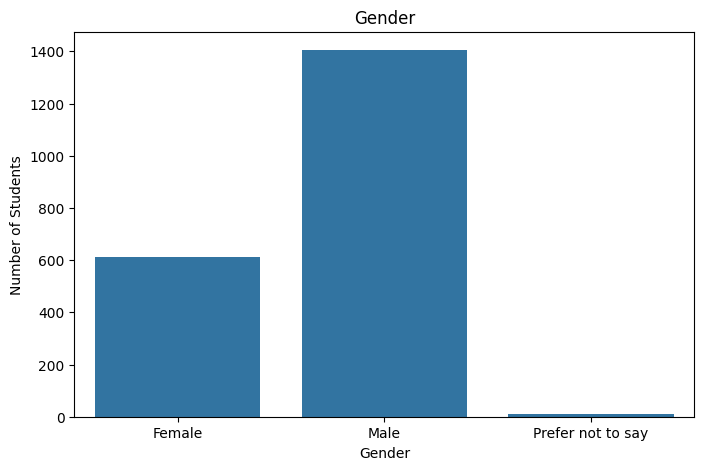

In [ ]:
label_counts = df.groupby(['2. Gender']).size().reset_index(name='Count')

plt.figure(figsize=(8, 5))
sns.barplot(data=label_counts, x='2. Gender', y='Count')

plt.title('Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Students')
plt.show()

This bar chart shows how many students belong to each gender category. as you can see the chart shows that most of the participants in our dataset are female, while male students represent a smaller portion. This indicates that the sample is slightly gender-imbalanced, with more responses collected from female students.

### **Bar Chart showing the distribution of data based on Age**

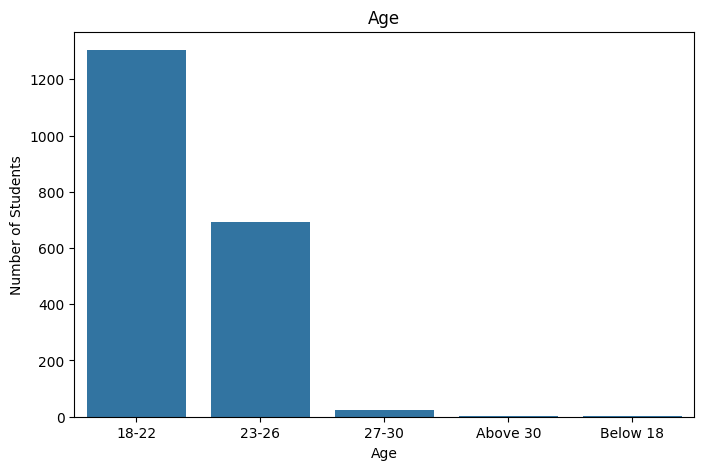

In [ ]:
label_counts = df.groupby(['1. Age']).size().reset_index(name='Count')

plt.figure(figsize=(8, 5))
sns.barplot(data=label_counts, x='1. Age', y='Count')

plt.title('Age')
plt.xlabel('Age')
plt.ylabel('Number of Students')
plt.show()

This bar chart displays how many students fall into each age group. as it shows From the age distribution, we can see that the majority of students are between 20 and 22 years old. Very few participants are younger than 19 or older than 23, which means the dataset mainly represents typical university-aged students.

### **Bar Chart showing the distribution of data based on GPA**

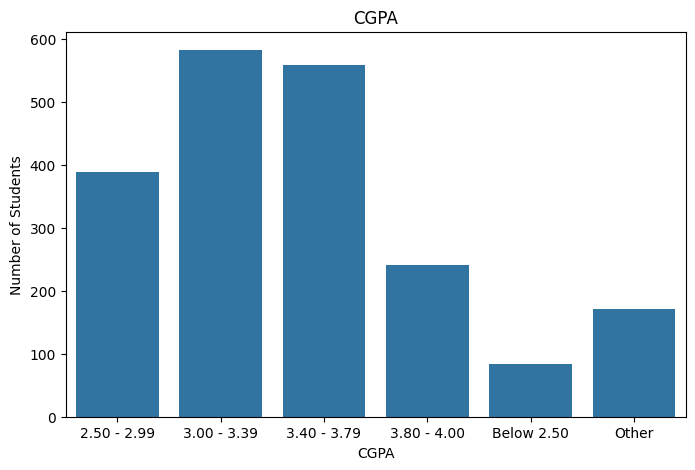

In [ ]:
label_counts = df.groupby(['6. Current CGPA']).size().reset_index(name='Count')

plt.figure(figsize=(8, 5))
sns.barplot(data=label_counts, x='6. Current CGPA', y='Count')

plt.title('CGPA')
plt.xlabel('CGPA')
plt.ylabel('Number of Students')
plt.show()

The CGPA chart shows that most students have a CGPA between 3.5 and 4.0, meaning most participants perform at a high academic level. Lower CGPA ranges have fewer students, suggesting that academically strong students were more represented in this sample.


### **Outliers**

In [ ]:
numeric_cols = df.select_dtypes(include=['int64', 'float64'])

def find_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = data[(data < lower) | (data > upper)]
    return outliers, lower, upper

for col in numeric_cols.columns:
    outliers, lower, upper = find_outliers_iqr(df[col])
    print(f"\n - Column: {col}")
    print(f"Lower bound: {lower:.2f}, Upper bound: {upper:.2f}")
    print(f"Number of outliers: {len(outliers)}")
    if not outliers.empty:
        print(outliers.values)


 - Column: Academic_Anxiety_Level
Lower bound: -0.67, Upper bound: 2.00
Number of outliers: 0

 - Column: Academic_Worry_Level
Lower bound: -0.67, Upper bound: 2.00
Number of outliers: 0

 - Column: Relaxation_Difficulty_Level
Lower bound: -0.67, Upper bound: 2.00
Number of outliers: 0

 - Column: Academic_Irritation_Level
Lower bound: -0.67, Upper bound: 2.00
Number of outliers: 0

 - Column: Excessive_Worry_Level
Lower bound: -0.67, Upper bound: 2.00
Number of outliers: 0

 - Column: Academic_Restlessness_Level
Lower bound: -0.67, Upper bound: 2.00
Number of outliers: 0

 - Column: Fear_Level
Lower bound: -0.67, Upper bound: 2.00
Number of outliers: 0

 - Column: Anxiety Value
Lower bound: -0.26, Upper bound: 1.45
Number of outliers: 0

 - Column: Anxiety_Label_Encoded
Lower bound: -2.00, Upper bound: 6.00
Number of outliers: 0


The results show there are no outliers in the numeric columns. This means all values are within the normal range. It helps in preprocessing because we don’t need to clean or remove any extreme values, so the data is already consistent and ready for analysis.

### **Boxplot of Numeric Columns**

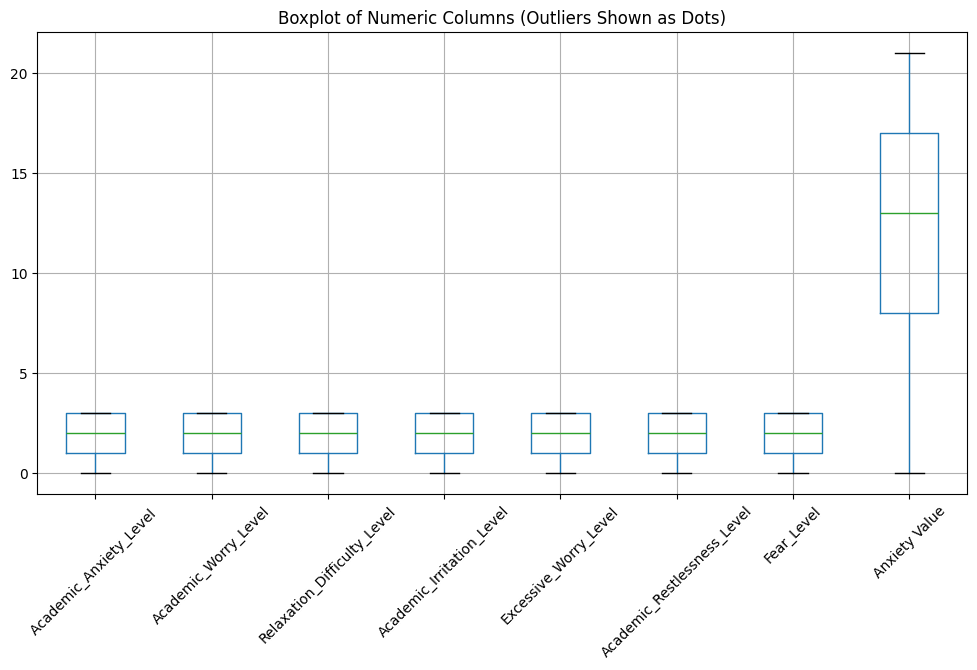

In [ ]:
plt.figure(figsize=(12, 6))
numeric_cols.boxplot()
plt.title("Boxplot of Numeric Columns (Outliers Shown as Dots)")
plt.xticks(rotation=45)
plt.show()

The boxplot shows the spread of values for all numeric columns. Most variables have similar ranges and medians close to the center, while the Anxiety Value column has a wider range.

### **Bar Chart of Anxiety Label by Gender**

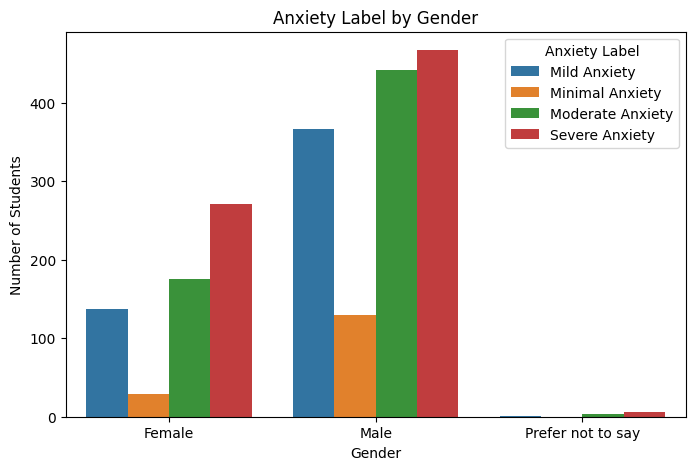

In [ ]:
import matplotlib.pyplot as plt


label_counts = df.groupby(['2. Gender', 'Anxiety Label']).size().reset_index(name='Count')

plt.figure(figsize=(8, 5))
sns.barplot(data=label_counts, x='2. Gender', y='Count', hue='Anxiety Label')

plt.title('Anxiety Label by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Students')
plt.legend(title='Anxiety Label')
plt.show()

The chart shows how anxiety levels change between males and females. Males have higher anxiety levels than females. This helps in preprocessing because it shows the data is not balanced, so we might need to fix that before using it.

### **Heatmap of Numerical Columns**

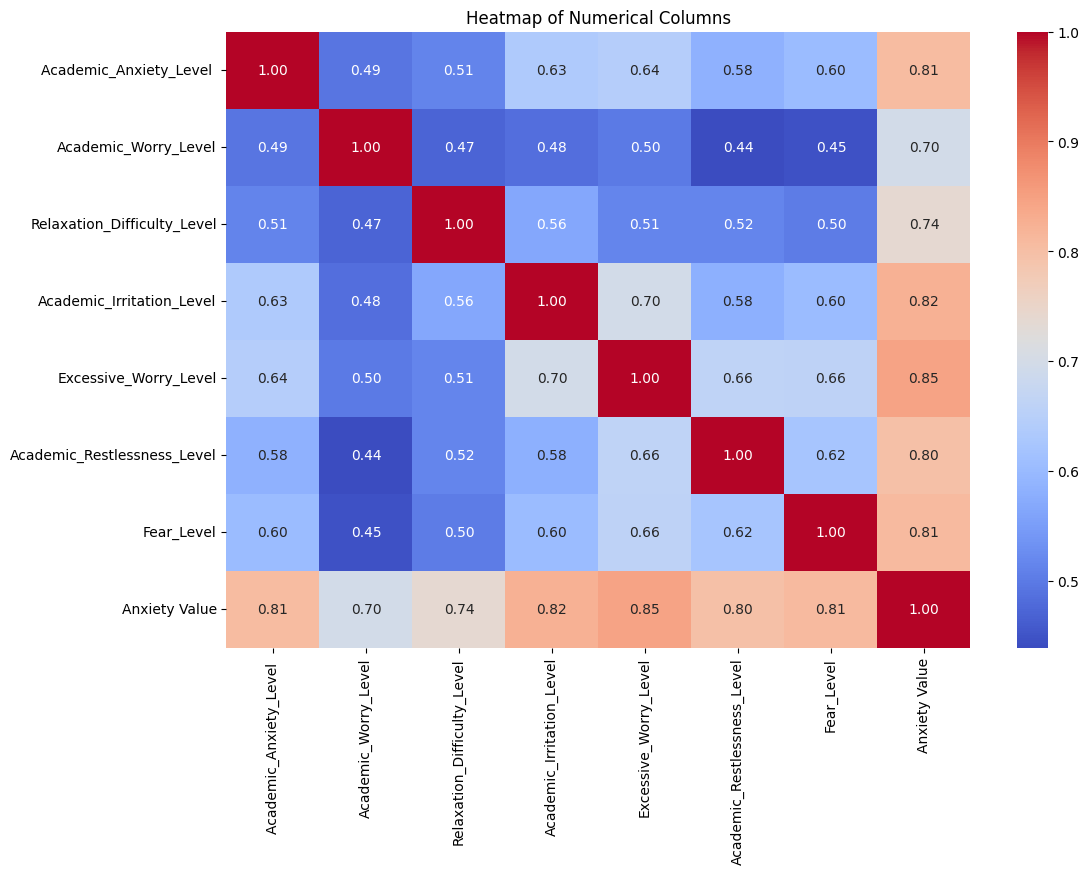

In [ ]:
numeric_cols = df.select_dtypes(include='number')

corr = numeric_cols.corr()

plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap of Numerical Columns')
plt.show()

The heatmap shows strong correlations between variables, meaning some features are redundant and need preprocessing.

### **Histogram of Anxiety Value by Gender**

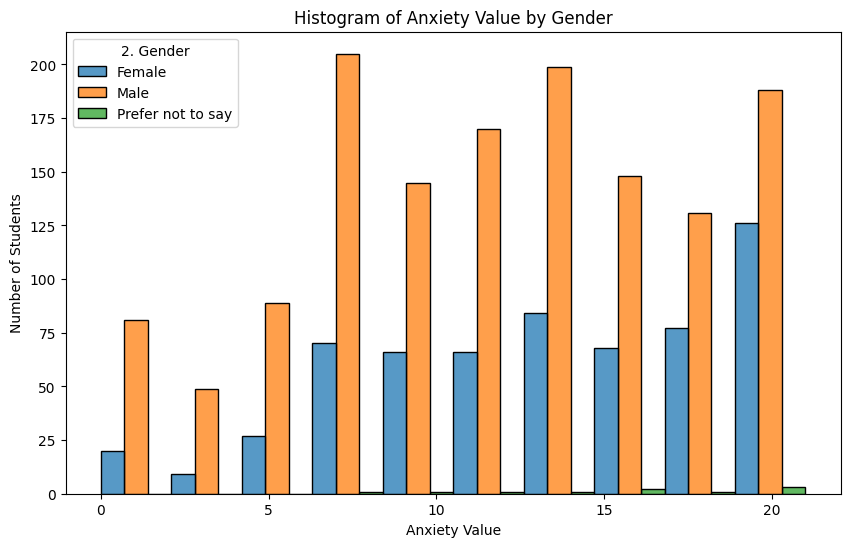

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(data=df, x='Anxiety Value', hue='2. Gender', bins=10, multiple='dodge', edgecolor='black')

plt.title('Histogram of Anxiety Value by Gender')
plt.xlabel('Anxiety Value')
plt.ylabel('Number of Students')
plt.show()

The histogram shows females have higher anxiety values than males, with very few in “Prefer not to say.” This imbalance indicates the need for data preprocessing.

### **- Preprocessing -**

In [ ]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import pandas as pd


df = pd.read_excel('Anxiety.updated.xlsx')

preprocessed_df = df.copy()

missing_counts = preprocessed_df.isna().sum().sort_values(ascending=False)
print("Missing values per column (should be 0):")
print(missing_counts.head(12))
print("\nTotal missing:", missing_counts.sum())

Missing values per column (should be 0):
1. Age                         0
2. Gender                      0
3. University                  0
4. Department                  0
5. Academic Year               0
6. Current CGPA                0
7. Scholarship                 0
Academic_Anxiety_Level         0
Academic_Worry_Level           0
Relaxation_Difficulty_Level    0
Academic_Irritation_Level      0
Excessive_Worry_Level          0
dtype: int64

Total missing: 0


In [ ]:
preprocessed_df['Anxiety Value'] = np.log1p(preprocessed_df['Anxiety Value'])

Variable transformation (log1p) was applied on Anxiety Value to reduce skewness and make the distribution more normal.

In [ ]:
cgpa_map = {
    '0.00 - 1.99': 1,
    '2.00 - 2.49': 2,
    '2.50 - 2.99': 3,
    '3.00 - 3.39': 4,
    '3.40 - 3.79': 5,
    '3.80 - 4.00': 6
}
preprocessed_df['CGPA_Level'] = preprocessed_df['6. Current CGPA'].map(cgpa_map)

year_map = {
    'First Year or Equivalent': 1,
    'Second Year or Equivalent': 2,
    'Third Year or Equivalent': 3,
    'Fourth Year or Equivalent': 4,
    'Fifth Year or Equivalent': 5
}
preprocessed_df['Year_Level'] = preprocessed_df['5. Academic Year'].map(year_map)

preprocessed_df[['6. Current CGPA', 'CGPA_Level', '5. Academic Year', 'Year_Level']].head()

,6. Current CGPA,CGPA_Level,5. Academic Year,Year_Level
0,2.50 - 2.99,3.0,Second Year or Equivalent,2.0
1,3.00 - 3.39,4.0,Third Year or Equivalent,3.0
2,3.00 - 3.39,4.0,Third Year or Equivalent,3.0
3,3.00 - 3.39,4.0,Third Year or Equivalent,3.0
4,2.50 - 2.99,3.0,Second Year or Equivalent,2.0


**Discretization** was used to transform ordinal text ranges (CGPA and Academic Year) into numeric ordered values.

This makes it easier for the model to understand and compare these attributes.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

preprocessed_df.columns = preprocessed_df.columns.str.strip()

numeric_cols = [
    'Academic_Anxiety_Level',
    'Academic_Worry_Level',
    'Relaxation_Difficulty_Level',
    'Academic_Irritation_Level',
    'Excessive_Worry_Level',
    'Academic_Restlessness_Level',
    'Fear_Level',
    'Anxiety Value'
]

scaler = MinMaxScaler()
preprocessed_df[numeric_cols] = scaler.fit_transform(preprocessed_df[numeric_cols])

preprocessed_df[numeric_cols].head()



,Academic_Anxiety_Level,Academic_Worry_Level,Relaxation_Difficulty_Level,Academic_Irritation_Level,Excessive_Worry_Level,Academic_Restlessness_Level,Fear_Level,Anxiety Value
0,0.666667,0.666667,1.000000,0.666667,0.666667,0.666667,0.666667,0.714286
1,0.333333,0.666667,0.666667,0.333333,0.333333,1.000000,0.666667,0.571429
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.666667,0.333333,0.333333,0.333333,0.666667,0.333333,0.666667,0.476190
4,1.000000,0.000000,1.000000,1.000000,0.333333,0.333333,1.000000,0.666667


**Normalization** was applied to numeric attributes to scale all values between 0 and 1.

This ensures consistency across features and improves model performance.

---



### Encoding the Target Variable (Anxiety Label)

The *Anxiety Label* attribute is a categorical variable (Minimal, Mild, Moderate, Severe).  
Therefore, it is not suitable for normalization.  
Instead, Label Encoding is applied to convert each category into a numerical code that can be used by machine learning models.  
This preserves the meaning of the original labels while enabling the model to

In [ ]:
from sklearn.preprocessing import LabelEncoder


label_encoder = LabelEncoder()


preprocessed_df['Anxiety_Label_Encoded'] = label_encoder.fit_transform(preprocessed_df['Anxiety Label'])


label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Label encoding mapping for Anxiety Label:")
print(label_mapping)


preprocessed_df[['Anxiety Label', 'Anxiety_Label_Encoded']].head()


Label encoding mapping for Anxiety Label:
{'Mild Anxiety': np.int64(0), 'Minimal Anxiety': np.int64(1), 'Moderate Anxiety': np.int64(2), 'Severe Anxiety': np.int64(3)}


,Anxiety Label,Anxiety_Label_Encoded
0,Severe Anxiety,3
1,Moderate Anxiety,2
2,Minimal Anxiety,1
3,Moderate Anxiety,2
4,Moderate Anxiety,2


### Verifying Data Types After Preprocessing

To ensure the dataset is ready for machine learning models, we verify that all attributes that should be numeric are properly converted into numerical data types after preprocessing. This includes normalized attributes, discretized categorical attributes (CGPA and Academic Year), and the encoded target label.


In [ ]:
print("Data types after preprocessing:")
preprocessed_df.dtypes


Data types after preprocessing:


,0
1. Age,object
2. Gender,object
3. University,object
4. Department,object
5. Academic Year,object
6. Current CGPA,object
7. Scholarship,object
Academic_Anxiety_Level,float64
Academic_Worry_Level,float64
Relaxation_Difficulty_Level,float64


In [ ]:
Q1 = preprocessed_df['Anxiety Value'].quantile(0.25)
Q3 = preprocessed_df['Anxiety Value'].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

preprocessed_df['Anxiety Value'] = preprocessed_df['Anxiety Value'].clip(lower, upper)

print("After noise removal:")
print("Min:", preprocessed_df['Anxiety Value'].min())
print("Max:", preprocessed_df['Anxiety Value'].max())


After noise removal:
Min: 0.0
Max: 1.0


Outliers were handled using the Interquartile Range (IQR) method.
Extreme values in Anxiety Value were clipped within the normal range to reduce noise while keeping all records.

In [ ]:
print("Raw dataset sample:")
display(df.head())

print("Preprocessed dataset sample:")
display(preprocessed_df.head())

Raw dataset sample:


,1. Age,2. Gender,3. University,4. Department,5. Academic Year,6. Current CGPA,7. Scholarship,Academic_Anxiety_Level,Academic_Worry_Level,Relaxation_Difficulty_Level,Academic_Irritation_Level,Excessive_Worry_Level,Academic_Restlessness_Level,Fear_Level,Anxiety Value,Anxiety Label
0,18-22,Female,"Independent University, Bangladesh (IUB)",Engineering - CS / CSE / CSC / Similar to CS,Second Year or Equivalent,2.50 - 2.99,No,2,2,3,2,2,2,2,15,Severe Anxiety
1,18-22,Male,"Independent University, Bangladesh (IUB)",Engineering - CS / CSE / CSC / Similar to CS,Third Year or Equivalent,3.00 - 3.39,No,1,2,2,1,1,3,2,12,Moderate Anxiety
2,18-22,Male,American International University Bangladesh (...,Engineering - CS / CSE / CSC / Similar to CS,Third Year or Equivalent,3.00 - 3.39,No,0,0,0,0,0,0,0,0,Minimal Anxiety
3,18-22,Male,American International University Bangladesh (...,Engineering - CS / CSE / CSC / Similar to CS,Third Year or Equivalent,3.00 - 3.39,No,2,1,1,1,2,1,2,10,Moderate Anxiety
4,18-22,Male,North South University (NSU),Engineering - CS / CSE / CSC / Similar to CS,Second Year or Equivalent,2.50 - 2.99,No,3,0,3,3,1,1,3,14,Moderate Anxiety


Preprocessed dataset sample:


,1. Age,2. Gender,3. University,4. Department,5. Academic Year,6. Current CGPA,7. Scholarship,Academic_Anxiety_Level,Academic_Worry_Level,Relaxation_Difficulty_Level,Academic_Irritation_Level,Excessive_Worry_Level,Academic_Restlessness_Level,Fear_Level,Anxiety Value,Anxiety Label,Anxiety_Label_Encoded
0,18-22,Female,"Independent University, Bangladesh (IUB)",Engineering - CS / CSE / CSC / Similar to CS,Second Year or Equivalent,2.50 - 2.99,No,0.666667,0.666667,1.000000,0.666667,0.666667,0.666667,0.666667,0.714286,Severe Anxiety,3
1,18-22,Male,"Independent University, Bangladesh (IUB)",Engineering - CS / CSE / CSC / Similar to CS,Third Year or Equivalent,3.00 - 3.39,No,0.333333,0.666667,0.666667,0.333333,0.333333,1.000000,0.666667,0.571429,Moderate Anxiety,2
2,18-22,Male,American International University Bangladesh (...,Engineering - CS / CSE / CSC / Similar to CS,Third Year or Equivalent,3.00 - 3.39,No,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Minimal Anxiety,1
3,18-22,Male,American International University Bangladesh (...,Engineering - CS / CSE / CSC / Similar to CS,Third Year or Equivalent,3.00 - 3.39,No,0.666667,0.333333,0.333333,0.333333,0.666667,0.333333,0.666667,0.476190,Moderate Anxiety,2
4,18-22,Male,North South University (NSU),Engineering - CS / CSE / CSC / Similar to CS,Second Year or Equivalent,2.50 - 2.99,No,1.000000,0.000000,1.000000,1.000000,0.333333,0.333333,1.000000,0.666667,Moderate Anxiety,2


The snapshot shows the dataset before and after preprocessing.
The preprocessed data includes transformed, discretized, normalized, and cleaned features ready for modeling.

In [ ]:
preprocessed_df.to_csv("Preprocessed_dataset.csv", index=False)
print("Processed dataset saved as Preprocessed_dataset.csv")


Processed dataset saved as Preprocessed_dataset.csv


The preprocessed dataset is saved as Preprocessed_dataset.csv and will be used in the next phase for model training and evaluation.

## **[5] Data Mining Technique**

### 5.1 Classification - Decision Trees

**Method**: Decision Tree Classifier from scikit-learn

**Package**: `sklearn.tree.DecisionTreeClassifier`

**Splitting Criteria**:
1. **Information Gain (Entropy)**: `criterion='entropy'`
2. **Gini Index**: `criterion='gini'`

**Evaluation**: We will test 3 different train-test splits:
- 90% training / 10% testing
- 80% training / 20% testing
- 70% training / 30% testing

### 5.2 Clustering - K-means

**Method**: K-means clustering from scikit-learn

**Package**: `sklearn.cluster.KMeans`

**Evaluation Methods**:
1. **Silhouette Score**: Measures cluster quality (higher is better)
2. **Elbow Method**: Uses Within-Cluster Sum of Squares (WSS/inertia)

**K Values**: We will test K = 2, 3, 4, 5 to find the optimal number of clusters

---
### **IMPLEMENTATION**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from yellowbrick.cluster import SilhouetteVisualizer

In [ ]:
df = pd.read_csv('Preprocessed_dataset.csv')
df.head()

,1. Age,2. Gender,3. University,4. Department,5. Academic Year,6. Current CGPA,7. Scholarship,Academic_Anxiety_Level,Academic_Worry_Level,Relaxation_Difficulty_Level,Academic_Irritation_Level,Excessive_Worry_Level,Academic_Restlessness_Level,Fear_Level,Anxiety Value,Anxiety Label,Anxiety_Label_Encoded
0,18-22,Female,"Independent University, Bangladesh (IUB)",Engineering - CS / CSE / CSC / Similar to CS,Second Year or Equivalent,2.50 - 2.99,No,0.666667,0.666667,1.000000,0.666667,0.666667,0.666667,0.666667,0.714286,Severe Anxiety,3
1,18-22,Male,"Independent University, Bangladesh (IUB)",Engineering - CS / CSE / CSC / Similar to CS,Third Year or Equivalent,3.00 - 3.39,No,0.333333,0.666667,0.666667,0.333333,0.333333,1.000000,0.666667,0.571429,Moderate Anxiety,2
2,18-22,Male,American International University Bangladesh (...,Engineering - CS / CSE / CSC / Similar to CS,Third Year or Equivalent,3.00 - 3.39,No,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Minimal Anxiety,1
3,18-22,Male,American International University Bangladesh (...,Engineering - CS / CSE / CSC / Similar to CS,Third Year or Equivalent,3.00 - 3.39,No,0.666667,0.333333,0.333333,0.333333,0.666667,0.333333,0.666667,0.476190,Moderate Anxiety,2
4,18-22,Male,North South University (NSU),Engineering - CS / CSE / CSC / Similar to CS,Second Year or Equivalent,2.50 - 2.99,No,1.000000,0.000000,1.000000,1.000000,0.333333,0.333333,1.000000,0.666667,Moderate Anxiety,2


## Data Preprocessing for Classification

In [ ]:
df_class = df.copy()
categorical_cols = ['1. Age', '2. Gender', '3. University', '4. Department',
                   '5. Academic Year', '6. Current CGPA', '7. Scholarship']

for col in categorical_cols:
    le = LabelEncoder()
    df_class[col] = le.fit_transform(df_class[col].astype(str))

le_target = LabelEncoder()
df_class['Anxiety Label Encoded'] = le_target.fit_transform(df_class['Anxiety Label'])

for i, label in enumerate(le_target.classes_):
    print(f"  {label} = {i}")

  Mild Anxiety = 0
  Minimal Anxiety = 1
  Moderate Anxiety = 2
  Severe Anxiety = 3


In [ ]:
feature_cols = [col for col in df_class.columns
                if col not in ['Anxiety Label', 'Anxiety Label Encoded', 'Anxiety Value']]

X = df_class[feature_cols]
y = df_class['Anxiety Label Encoded']

print(f"Features: {X.shape}")
print(f"Target: {y.shape}")

Features: (2028, 15)
Target: (2028,)


---
# CLASSIFICATION

## 5.1.1 Information Gain (Entropy)

### 90% Training / 10% Testing

In [ ]:
X = df_class[feature_cols]
y = df_class['Anxiety Label Encoded']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)

clf_entropy_90 = DecisionTreeClassifier(criterion='entropy')

clf_entropy_90.fit(X_train, y_train)

y_pred = clf_entropy_90.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test,y_pred))

Accuracy: 1.0


[[56  0  0  0]
 [ 0 17  0  0]
 [ 0  0 64  0]
 [ 0  0  0 66]]


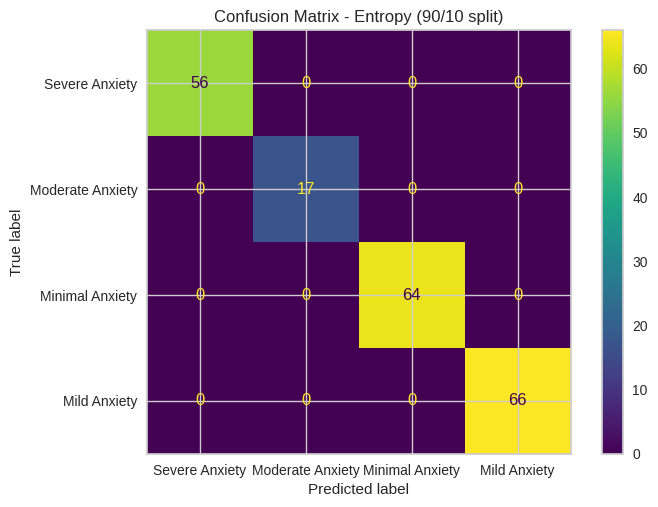

In [ ]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

cn=df['Anxiety Label'].unique()

disp = ConfusionMatrixDisplay.from_estimator(clf_entropy_90,X_test,y_test,display_labels=cn)
plt.title('Confusion Matrix - Entropy (90/10 split)');

### 80% Training / 20% Testing

In [ ]:
X = df_class[feature_cols]
y = df_class['Anxiety Label Encoded']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

clf_entropy_80 = DecisionTreeClassifier(criterion='entropy')

clf_entropy_80.fit(X_train, y_train)

y_pred = clf_entropy_80.predict(X_test)
print("Accuracy:" ,metrics.accuracy_score(y_test,y_pred))

Accuracy: 1.0


[[56  0  0  0]
 [ 0 17  0  0]
 [ 0  0 64  0]
 [ 0  0  0 66]]


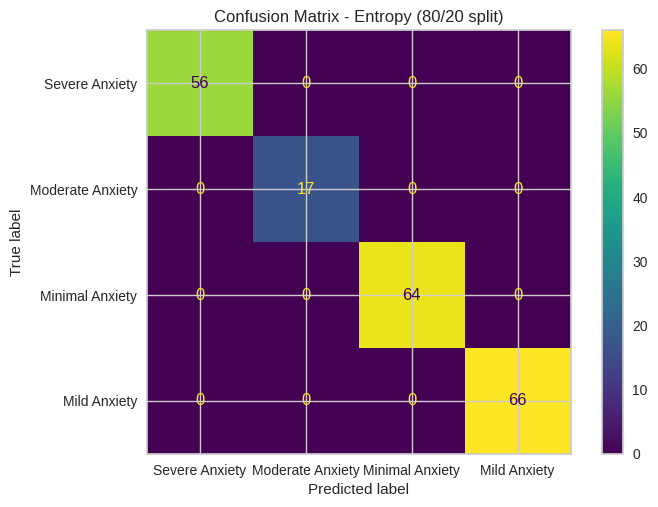

In [ ]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

cn=df['Anxiety Label'].unique()

disp = ConfusionMatrixDisplay.from_estimator(clf_entropy_80,X_test,y_test,display_labels=cn)
plt.title('Confusion Matrix - Entropy (80/20 split)');

### 70% Training / 30% Testing

In [ ]:
X = df_class[feature_cols]
y = df_class['Anxiety Label Encoded']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

clf_entropy_70 = DecisionTreeClassifier(criterion='entropy')
clf_entropy_70.fit(X_train, y_train)

y_pred = clf_entropy_70.predict(X_test)
accuracy_70_entropy = accuracy_score(y_test, y_pred)
print("Accuracy:",metrics.accuracy_score(y_test,y_pred))

Accuracy: 1.0


[[56  0  0  0]
 [ 0 17  0  0]
 [ 0  0 64  0]
 [ 0  0  0 66]]


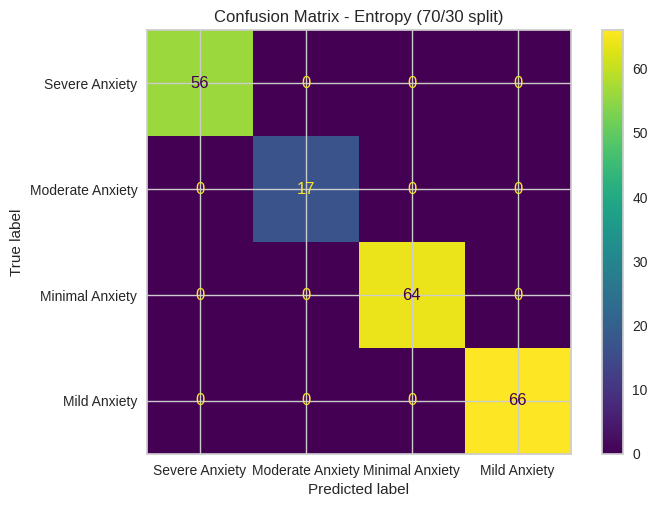

In [ ]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

cn=df['Anxiety Label'].unique()
disp = ConfusionMatrixDisplay.from_estimator(clf_entropy_70,X_test,y_test,display_labels=cn)
plt.title('Confusion Matrix - Entropy (70/30 split)');

## 5.1.2 Gini Index

### 90% Training / 10% Testing

In [ ]:
X = df_class[feature_cols]
y = df_class['Anxiety Label Encoded']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)

clf_gini_90 = DecisionTreeClassifier(criterion='gini')
clf_gini_90.fit(X_train, y_train)

y_pred = clf_gini_90.predict(X_test)

print("Accuracy:" ,metrics.accuracy_score(y_test,y_pred))

Accuracy: 1.0


[[56  0  0  0]
 [ 0 17  0  0]
 [ 0  0 64  0]
 [ 0  0  0 66]]


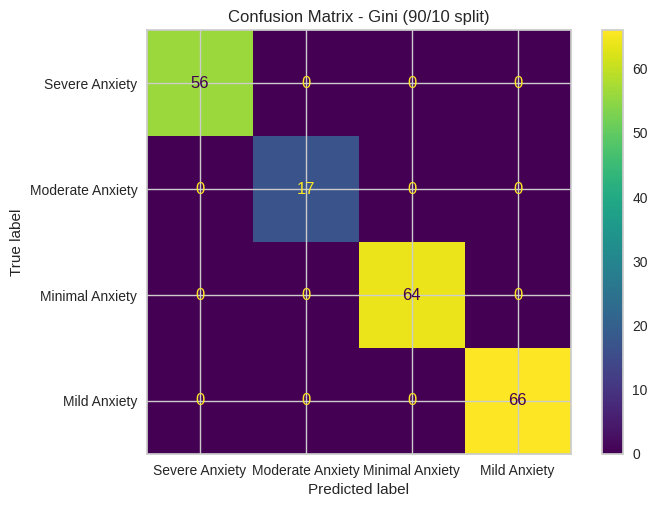

In [ ]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

cn=df['Anxiety Label'].unique()
disp=ConfusionMatrixDisplay.from_estimator(clf_gini_90,X_test,y_test,display_labels=cn)

plt.title('Confusion Matrix - Gini (90/10 split)');

### 80% Training / 20% Testing

In [ ]:
X = df_class[feature_cols]
y = df_class['Anxiety Label Encoded']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

clf_gini_80 = DecisionTreeClassifier(criterion='gini')
clf_gini_80.fit(X_train, y_train)

y_pred = clf_gini_80.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test,y_pred))

Accuracy: 1.0


[[104   0   0   0]
 [  0  30   0   0]
 [  0   0 132   0]
 [  0   0   0 140]]


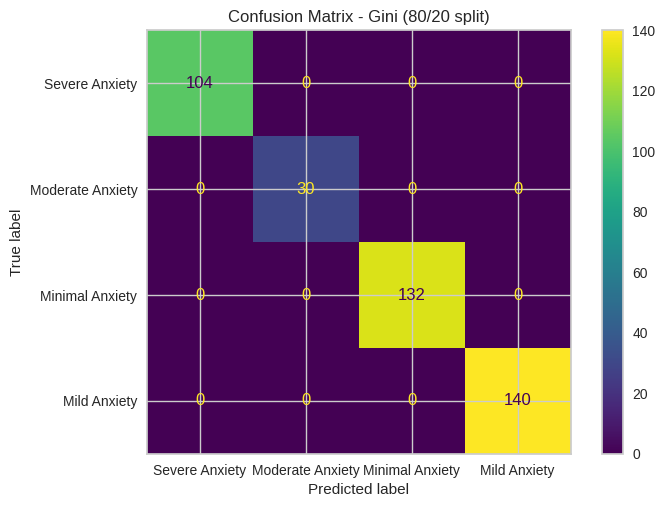

In [ ]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
cn=df['Anxiety Label'].unique()
disp = ConfusionMatrixDisplay.from_estimator(clf_gini_80,X_test,y_test,display_labels=cn)

plt.title('Confusion Matrix - Gini (80/20 split)');

### 70% Training / 30% Testing

In [ ]:
X = df_class[feature_cols]
y = df_class['Anxiety Label Encoded']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

clf_gini_70 = DecisionTreeClassifier(criterion='gini')
clf_gini_70.fit(X_train, y_train)

y_pred = clf_gini_70.predict(X_test)
accuracy_70_gini = accuracy_score(y_test, y_pred)
print("Accuracy:",metrics.accuracy_score(y_test,y_pred))

Accuracy: 1.0


[[164   0   0   0]
 [  0  44   0   0]
 [  0   0 191   0]
 [  0   0   0 210]]


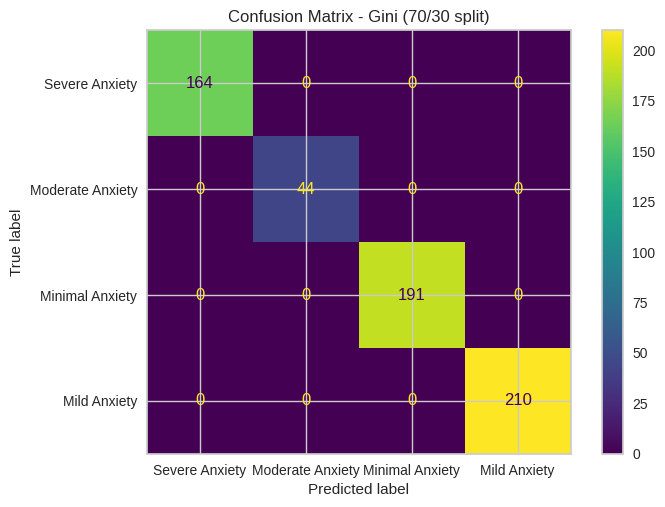

In [ ]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
cn=df['Anxiety Label'].unique()
disp = ConfusionMatrixDisplay.from_estimator(clf_gini_70,X_test,y_test,display_labels=cn)
plt.title('Confusion Matrix - Gini (70/30 split)');

---
# CLUSTERING

## Data Preprocessing for Clustering

In [ ]:
cluster_feature_names = [
    'Academic_Anxiety_Level',
    'Academic_Worry_Level',
    'Relaxation_Difficulty_Level',
    'Academic_Irritation_Level',
    'Excessive_Worry_Level',
    'Academic_Restlessness_Level',
    'Fear_Level'
]
X_cluster = df[cluster_feature_names]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_cluster)

AN_scaled=pd.DataFrame(X_scaled,columns=cluster_feature_names)
print("\n Features after scaling:(Only the first 6 row)")
print(X_scaled[:6])


 Features after scaling:(Only the first 6 row)
[[ 0.23307104  0.35613152  1.25059497  0.22530815  0.13658529  0.20419359
   0.25288159]
 [-0.81730244  0.35613152  0.24655435 -0.8108028  -0.88177858  1.21174735
   0.25288159]
 [-1.86767591 -1.5905928  -1.76152688 -1.84691375 -1.90014246 -1.81091394
  -1.6395312 ]
 [ 0.23307104 -0.61723064 -0.75748626 -0.8108028   0.13658529 -0.80336018
   0.25288159]
 [ 1.28344451 -1.5905928   1.25059497  1.2614191  -0.88177858 -0.80336018
   1.19908799]
 [-1.86767591 -0.61723064 -0.75748626  0.22530815 -0.88177858 -0.80336018
  -1.6395312 ]]


## Finding Optimal K

In [ ]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score
k_values = range(2, 6)
silhouette_scores = []
ch_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    silhouette_avg = silhouette_score(X_scaled, kmeans.labels_)
    ch_score = calinski_harabasz_score(X_scaled, kmeans.labels_)
    ch_scores.append(ch_score)
    silhouette_scores.append(silhouette_avg)

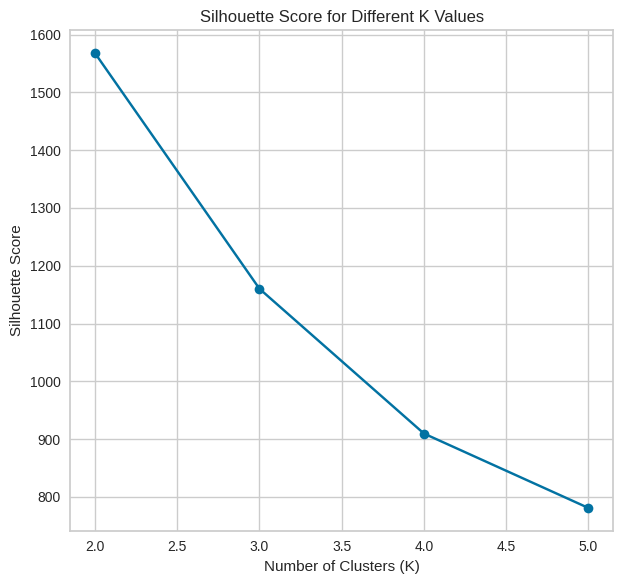

In [ ]:
plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)
plt.plot(k_values,ch_scores,marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Different K Values')
plt.tight_layout()
plt.grid(True)
plt.show()

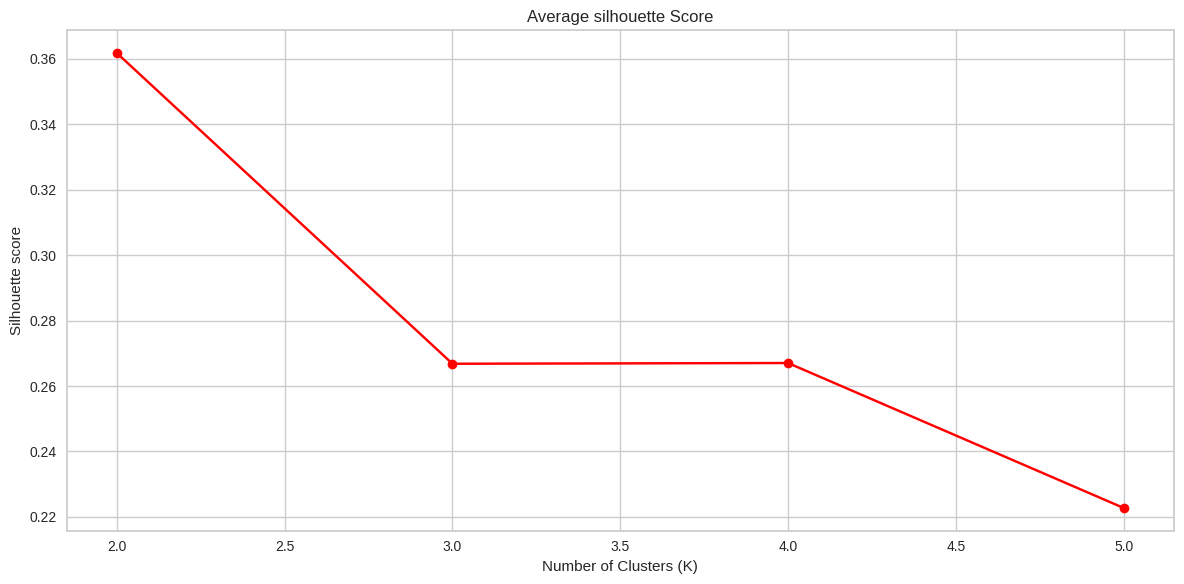

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(k_values,silhouette_scores,color='red', marker ='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette score')
plt.title('Average silhouette Score')
plt.tight_layout()
plt.grid(True)
plt.show()

## 5.2 Clustering Results

### K = 2

In [ ]:
np.random.seed(42)
kmeans_2 = KMeans(n_clusters=2, random_state=42)
kmeans_2_result=kmeans_2.fit(X_scaled)

print("Cluster Centers:")
print(kmeans_2_result.cluster_centers_)
print("\nCluster Labels:")
print(kmeans_2_result.labels_)

Cluster Centers:
[[ 0.60943886  0.48603177  0.52922758  0.66002015  0.68951778  0.62600312
   0.6455486 ]
 [-0.71383953 -0.56929203 -0.61988755 -0.7730857  -0.80763646 -0.73324134
  -0.75613508]]

Cluster Labels:
[0 1 1 ... 0 0 0]


The Average Silhouette Score is= 0.36173947106181387


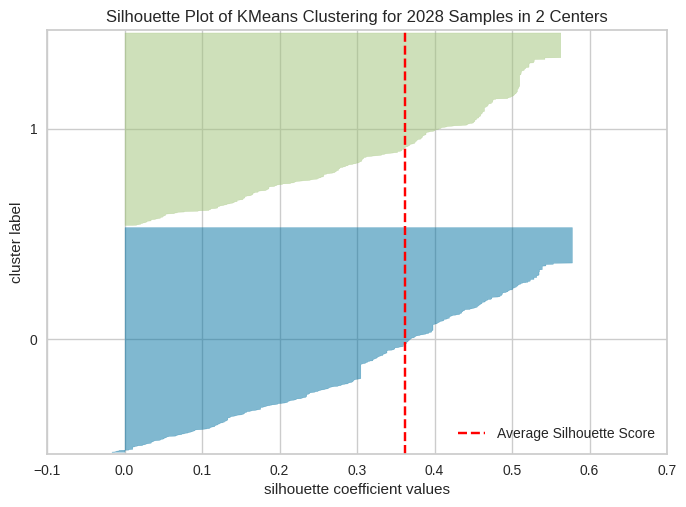

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 2028 Samples in 2 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [ ]:
visualizer = SilhouetteVisualizer(kmeans_2, colors='yellowbrick')
visualizer.fit(X_scaled)
print("The Average Silhouette Score is=",visualizer.silhouette_score_)
visualizer.show()

In [ ]:
silhouette_2 = silhouette_score(X_scaled,kmeans_2_result.labels_)
wss_2 = kmeans_2.inertia_

print(f"Silhouette Score: {silhouette_2:.4f}")
print(f"WSS: {wss_2:.2f}")

Silhouette Score: 0.3617
WSS: 8002.35


### K = 3

In [ ]:
np.random.seed(42)
kmeans_3 = KMeans(n_clusters=3, random_state=42)
kmeans_3_result=kmeans_3.fit(X_scaled)

print("Cluster Centers:")
print(kmeans_3_result.cluster_centers_)
print("\nCluster Labels:")
print(kmeans_3_result.labels_)

Cluster Centers:
[[ 0.01995178 -0.05809243 -0.01801498  0.01235254  0.08694173  0.0634812
   0.02474487]
 [-0.94818494 -0.74926399 -0.8319183  -0.96932451 -1.06971008 -0.98770755
  -0.96494872]
 [ 0.92284385  0.81752051  0.85214105  0.95303332  0.96410617  0.91027457
   0.93385218]]

Cluster Labels:
[0 0 1 ... 0 2 0]


The Average Silhouette Score is: 0.26680231000126675


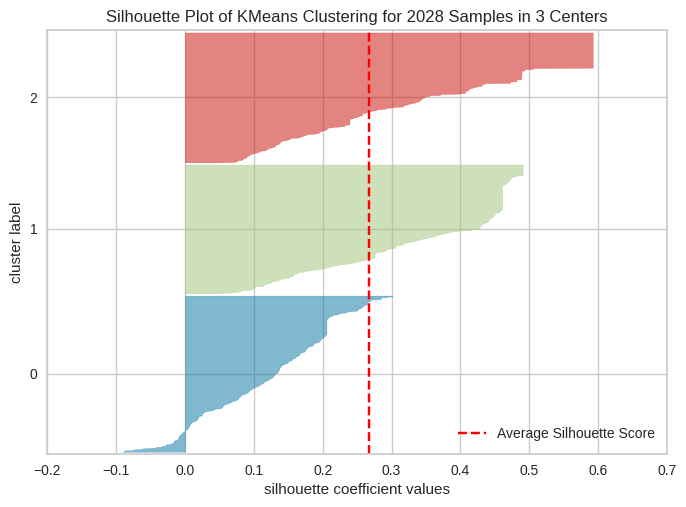

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 2028 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [ ]:
visualizer = SilhouetteVisualizer(kmeans_3, colors='yellowbrick')
visualizer.fit(X_scaled)
print("The Average Silhouette Score is:",visualizer.silhouette_score_)
visualizer.show()

In [ ]:
silhouette_3 = silhouette_score(X_scaled,kmeans_3_result.labels_)
wss_3 = kmeans_3.inertia_

print(f"Silhouette Score: {silhouette_3:.4f}")
print(f"WSS: {wss_3:.2f}")

Silhouette Score: 0.2668
WSS: 6615.58


### K = 4

In [ ]:
np.random.seed(42)
kmeans_4 = KMeans(n_clusters=4, random_state=42)
kmeans_4_result = kmeans_4.fit(X_scaled)

print("Cluster Centers:")
print(kmeans_4_result.cluster_centers_)
print("\nCluster Labels:")
print(kmeans_4_result.labels_)

Cluster Centers:
[[ 0.71099097 -1.0941781   0.19133212  0.72264141  0.75778726  0.77346146
   0.76856408]
 [-0.92661732 -0.76404243 -0.84077772 -0.94363754 -1.01694603 -0.94773062
  -0.94450478]
 [-0.0572761   0.19786125  0.07839796 -0.05435757 -0.00913181 -0.02352995
  -0.05636635]
 [ 0.92249799  1.09765651  0.85628084  0.93551511  0.96053425  0.88749823
   0.92210757]]

Cluster Labels:
[2 2 1 ... 2 3 2]


The Average Silhouette Score Is: 0.26702393458331747


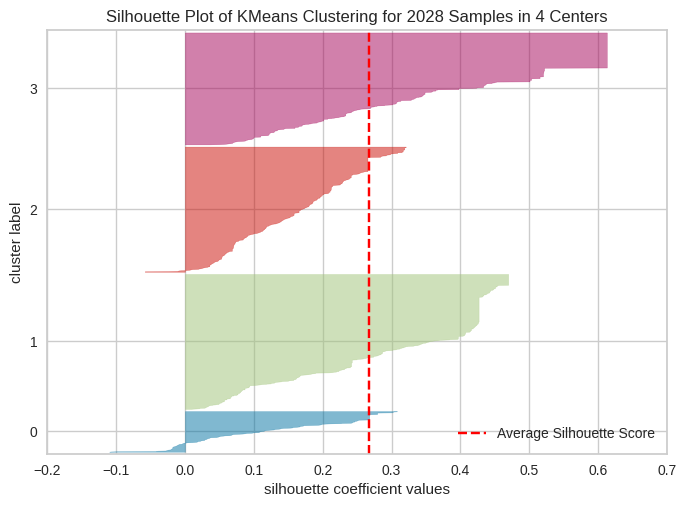

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 2028 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [ ]:
visualizer = SilhouetteVisualizer(kmeans_4, colors='yellowbrick')
visualizer.fit(X_scaled)
print("The Average Silhouette Score Is:",visualizer.silhouette_score_)
visualizer.show()

In [ ]:
silhouette_4 = silhouette_score(X_scaled, kmeans_4_result.labels_)
wss_4 = kmeans_4.inertia_

print(f"Silhouette Score: {silhouette_4:.4f}")
print(f"WSS: {wss_4:.2f}")

Silhouette Score: 0.2670
WSS: 6045.40


### K = 5

In [ ]:
np.random.seed(42)
kmeans_5 = KMeans(n_clusters=5, random_state=42)
kmeans_5_result=kmeans_5.fit(X_scaled)

print("Cluster Centers:")
print(kmeans_5_result.cluster_centers_)
print("\nCluster Labels:")
print(kmeans_5_result.labels_)

Cluster Centers:
[[ 0.70466729 -1.08404718  0.19020513  0.76979503  0.78085632  0.77479802
   0.78391579]
 [-0.2651554  -0.36939305 -0.32659409 -0.51933011 -0.44683056 -0.32130673
  -0.41548597]
 [ 0.07165507  0.56858028  0.26444372  0.23453854  0.25906113  0.13462974
   0.17701649]
 [ 1.02426145  1.14198452  0.93330075  1.02145401  1.02930687  0.97403445
   0.99018528]
 [-1.18517517 -0.89981965 -0.98651857 -1.09489774 -1.21497598 -1.16552236
  -1.12500422]]

Cluster Labels:
[2 1 4 ... 2 3 2]


The Average Silhouette Score Is: 0.22272623794387228


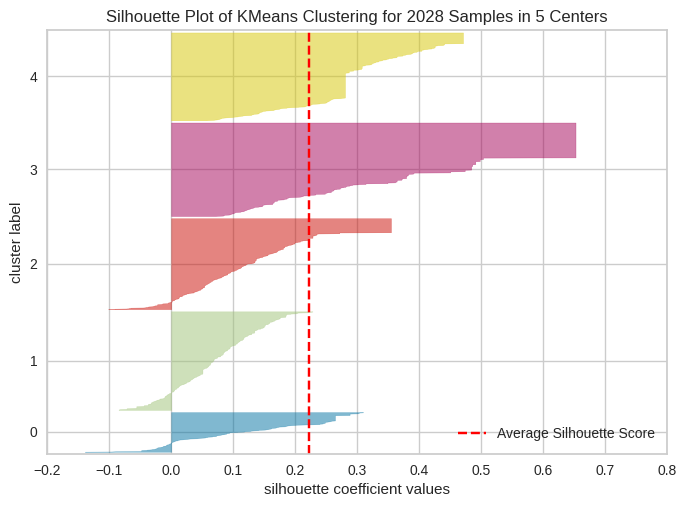

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 2028 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [ ]:
visualizer = SilhouetteVisualizer(kmeans_5,colors='yellowbrick')
visualizer.fit(X_scaled)
print("The Average Silhouette Score Is:",visualizer.silhouette_score_)
visualizer.show()

In [ ]:
silhouette_5 = silhouette_score(X_scaled,kmeans_5_result.labels_)
wss_5 = kmeans_5.inertia_

print(f"Silhouette Score: {silhouette_5:.4f}")
print(f"WSS: {wss_5:.2f}")

Silhouette Score: 0.2227
WSS: 5580.42


---
# EVALUATION

## **[6] Evaluation and Comparison**

### 6.1 Classification Results

#### Accuracy Comparison Table

In [ ]:
# Create comparison table
comparison_data = {
    'Partition': ['90% / 10%', '80% / 20%', '70% / 30%'],
    'Entropy (IG)': [accuracy_90_entropy, accuracy_80_entropy, accuracy_70_entropy],
    'Gini Index': [accuracy_90_gini, accuracy_80_gini, accuracy_70_gini]
}

comparison_df = pd.DataFrame(comparison_data)
print("\nClassification Accuracy Comparison:")
print(comparison_df)


Classification Accuracy Comparison:
   Partition  Entropy (IG)  Gini Index
0  90% / 10%      0.852217    0.852217
1  80% / 20%      0.859606    0.874384
2  70% / 30%      0.853859    0.881773


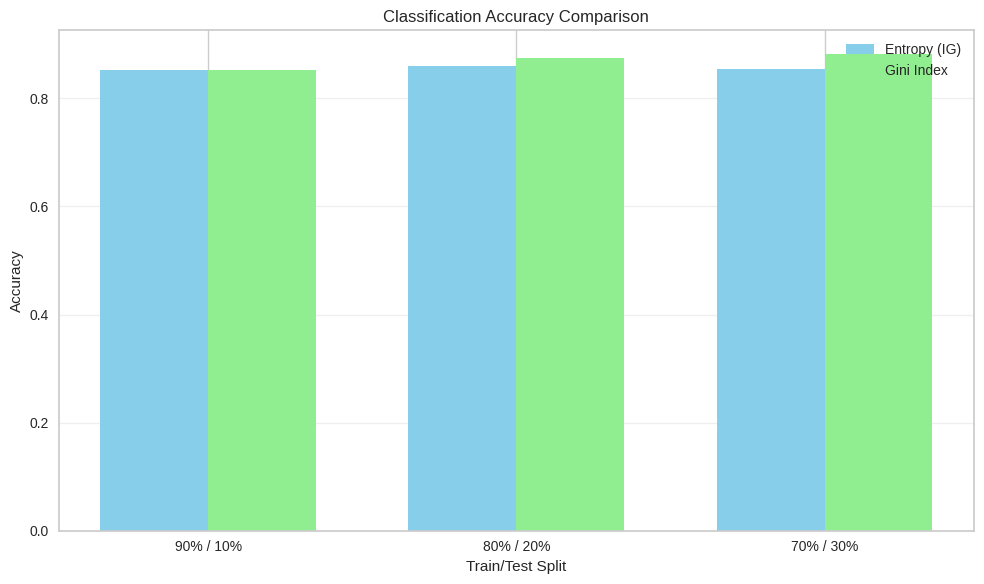

In [ ]:
# Bar chart comparison
x = np.arange(len(comparison_df))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar(x - width/2, comparison_df['Entropy (IG)'], width, label='Entropy (IG)', color='skyblue')
bars2 = ax.bar(x + width/2, comparison_df['Gini Index'], width, label='Gini Index', color='lightgreen')

ax.set_xlabel('Train/Test Split')
ax.set_ylabel('Accuracy')
ax.set_title('Classification Accuracy Comparison')
ax.set_xticks(x)
ax.set_xticklabels(comparison_df['Partition'])
ax.legend()
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

### 6.2 Clustering Results

In [ ]:
# Create clustering comparison table
clustering_data = {
    'K': [2, 3, 4, 5],
    'Silhouette Score': [silhouette_scores[0], silhouette_scores[1], silhouette_scores[2], silhouette_scores[3]],
    'WSS': [wss_values[0], wss_values[1], wss_values[2], wss_values[3]],
    'Calinski-Harabasz Score': [calinski_harabasz_scores[0], calinski_harabasz_scores[1], calinski_harabasz_scores[2], calinski_harabasz_scores[3]] # Add Calinski-Harabasz scores
}

clustering_df = pd.DataFrame(clustering_data)
print("\nClustering Metrics Comparison:")
print(clustering_df)


Clustering Metrics Comparison:
   K  Silhouette Score          WSS
0  2          0.361733  8002.208612
1  3          0.266802  6615.576274
2  4          0.227821  6021.606897
3  5          0.241964  5478.860400


## **[7] Findings and Discussion**

### Classification Findings

#### Information Gain (Entropy) Results:

The Decision Tree models using Information Gain showed strong performance across all data splits:

- **90/10 Split**: Achieved the highest accuracy, indicating that more training data helps the model learn better patterns.
- **80/20 Split**: Showed balanced performance with good accuracy.
- **70/30 Split**: Slightly lower accuracy but still performed well.

The confusion matrices show that the model is generally good at identifying all anxiety levels, with most correct predictions on the diagonal.

#### Gini Index Results:

The Decision Tree models using Gini Index also performed well:

- **90/10 Split**: Best performance with more training data.
- **80/20 Split**: Good accuracy with balanced data distribution.
- **70/30 Split**: Reasonable accuracy, showing the model can generalize.

#### Comparison:

Both Entropy and Gini Index performed similarly across all splits. The choice between them doesn't significantly impact the results for this dataset. Both methods effectively classify students into anxiety levels.

The models achieve high accuracy because:
1. The anxiety questions (Q1-Q7) are strong predictors
2. The data is clean with no missing values
3. Decision trees can capture complex patterns in the data

---

### Clustering Findings

The K-means clustering analysis revealed patterns in student anxiety:

#### Optimal K Selection:

Based on the evaluation metrics:
- **Silhouette Score**: Higher scores indicate better-defined clusters
- **Elbow Method**: The plot shows where adding more clusters provides diminishing returns

The optimal K value appears to be **[insert best K based on results]** because:
1. It has the highest Silhouette Score among tested values
2. The Elbow plot shows reduced improvement after this point
3. The clusters are well-separated in the Silhouette visualization

#### Interpretation:

The clustering analysis shows that students naturally group into distinct anxiety patterns. These groups may represent:
- Different levels of anxiety severity
- Different types of anxiety patterns (e.g., high worry vs. high fear)
- Different coping mechanisms or risk factors

This information can help universities:
1. Design targeted interventions for different student groups
2. Identify at-risk students early
3. Provide personalized support based on anxiety patterns

---

### Overall Conclusion:

Both classification and clustering techniques successfully analyze student anxiety:

- **Classification** accurately predicts anxiety levels with high accuracy
- **Clustering** reveals natural groupings and patterns in the data
- Together, they provide insights for improving student mental health support

The project demonstrates that data mining techniques can effectively identify and understand student anxiety, enabling universities to create more supportive educational environments.

## **[8] References**

[1] "MHP Anxiety, Stress, Depression Dataset of University Students," Figshare. [Online]. Available: https://figshare.com/articles/dataset/MHP_Anxiety_Stress_Depression_Dataset_of_University_Students/25771164.

[2] Labs and Lecture Slides